# Creating a Wine Recommender Model from Tasting Notes and Varietal

## Text Cleaning

In [371]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [372]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
df = pd.read_csv('/Users/emmaalexander/Desktop/wine_reviews.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [373]:
df_desc = df[['title','description','variety']]
df_desc

,title,description,variety
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",White Blend
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Pinot Noir
...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
129967,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Pinot Noir
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Gewürztraminer
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris


In [374]:
df_desc = df_desc.drop_duplicates(subset=['title'])
df_desc

,title,description,variety
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",White Blend
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Pinot Noir
...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
129967,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Pinot Noir
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Gewürztraminer
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris


In [606]:
df['description'][400]

"Tonic and lean with a nearly transparent color and lively perlage, this non-DOC Prosecco offers candy-like aromas of butterscotch and lemon soda. There's an interesting touch of crushed white peppercorn in there as well and this well-priced wine would make a perfect match to appetizers and finger foods."

In [375]:
df_fave = pd.read_csv('/Users/emmaalexander/Downloads/my_wines_4.csv')
df_desc = pd.concat([df_fave,df_desc]).reset_index()
df_desc

,index,title,description,variety
0,0,2020 Black Walnut White,"The 2020 vintage of our signature white blend,...",Traminette
1,1,James River Hanover Red,"This blend opens with a bright, fruit-forward ...",Chambourcin
2,2,Chandon Brut Rose,"In the glass, this Rose is a pretty pink with ...",Sparkling Blend
3,3,De Venoge Cordon Bleu Rose Brut,Snappy acidity provides a mouthwatering qualit...,Champagne Blend
4,0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",White Blend
...,...,...,...,...
118839,129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
118840,129967,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Pinot Noir
118841,129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Gewürztraminer
118842,129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris


#### Consolidating common phrases that refer to the same concept

In [386]:
df_desc['description'] = df_desc.description.str.replace('off dry','off_dry')
df_desc['description'] = df_desc.description.str.replace('offdry','off_dry')
df_desc['description'] = df_desc.description.str.replace('off-dry','off_dry')
df_desc['description'] = df_desc.description.str.replace('not sweet','off_dry')
df_desc['description'] = df_desc.description.str.replace('not really sweet','off_dry')
df_desc['description'] = df_desc.description.str.replace('medium dry','medium_dry')
df_desc['description'] = df_desc.description.str.replace('not powerful','not_powerful')
df_desc['description'] = df_desc.description.str.replace('not a dry','sweet')
df_desc['description'] = df_desc.description.str.replace('not dry','sweet')
df_desc['description'] = df_desc.description.str.replace('not especially complex','simple')
df_desc['description'] = df_desc.description.str.replace('not extremely complex','simple')
df_desc['description'] = df_desc.description.str.replace('not very complex','simple')
df_desc['description'] = df_desc.description.str.replace('not much complexity','simple')
df_desc['description'] = df_desc.description.str.replace('not enough fruit richness','not_fruity')
df_desc['description'] = df_desc.description.str.replace('not show the ripe fruit','not_fruity')
df_desc['description'] = df_desc.description.str.replace("balance isn't",'not_balanced')
df_desc['description'] = df_desc.description.str.replace("fruit juice",'fruit_juice')
df_desc['description'] = df_desc.description.str.replace("not a big, tannic wine",'not_tannic')
df_desc['description'] = df_desc.description.str.replace("not tannic",'not_tannic')
df_desc['description'] = df_desc.description.str.replace("not yet ready",'not_ready')
df_desc['description'] = df_desc.description.str.replace("not quite ready",'not_ready')
df_desc['description'] = df_desc.description.str.replace("not presently accessible",'not_ready')
df_desc['description'] = df_desc.description.str.replace("not yet completely integrated",'not_ready')
df_desc.head()

,index,title,description,variety
0,0,2020 Black Walnut White,"The 2020 vintage of our signature white blend,...",Traminette
1,1,James River Hanover Red,"This blend opens with a bright, fruit-forward ...",Chambourcin
2,2,Chandon Brut Rose,"In the glass, this Rose is a pretty pink with ...",Sparkling_Blend
3,3,De Venoge Cordon Bleu Rose Brut,Snappy acidity provides a mouthwatering qualit...,Champagne_Blend
4,0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",White_Blend


In [387]:
df_desc.shape

(118844, 4)

In [351]:
df_desc.variety.unique()

array(['Traminette', 'Chambourcin', 'Sparkling Blend', 'Champagne Blend',
       'White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Bordeaux-style Red Blend',
       'Aglianico', 'Petite Sirah', 'Touriga Nacional', 'Carmenère',
       'Albariño', 'Petit Manseng', 'Rosé', 'Zinfandel', 'Vernaccia',
       'Rosato', 'Grüner Veltliner', 'Viognier', 'Vermentino',
       'Grenache Blanc', 'Syrah', 'Nebbiolo', 'Shiraz-Cabernet Sauvignon',
       'Pinot Blanc', 'Alsace white blend', 'Barbera',
       'Rhône-style Red Blend', 'Portuguese

### spaCy and text preprocessing

#### Lemmatize and grab only nouns and adjectives

In [388]:
docs = list(nlp.pipe(df_desc.description))
docs_clean = [[w.lemma_.lower() for w in doc if (not w.is_stop and not w.is_punct and not w.like_num) & ((w.pos_ == 'PROPN') | (w.pos_ == 'NOUN') | (w.pos_ == 'ADJ')) \
               or (w.lemma_=='not')] for doc in docs]
df_desc['description'] = docs_clean
df_desc.head()

,index,title,description,variety
0,0,2020 Black Walnut White,"[vintage, signature, white, blend, black, waln...",Traminette
1,1,James River Hanover Red,"[blend, bright, fruit, forward, beginning, gra...",Chambourcin
2,2,Chandon Brut Rose,"[glass, rose, pink, intense, ripe, strawberry,...",Sparkling_Blend
3,3,De Venoge Cordon Bleu Rose Brut,"[snappy, acidity, quality, toasted, nut, tangy...",Champagne_Blend
4,0,Nicosia 2013 Vulkà Bianco (Etna),"[aroma, tropical, fruit, broom, brimstone, her...",White_Blend


#### Consolidating words that spaCy didn't

In [389]:
df_desc['description'] = [' '.join(doc) for doc in df_desc.description]
df_desc['description'] = df_desc.description.str.replace('acid ','acidic ')
df_desc['description'] = df_desc.description.str.replace('grassy','grass')
df_desc['description'] = df_desc.description.str.replace('syrupy','syrup')
df_desc['description'] = df_desc.description.str.replace('oaky','oak')
df_desc['description'] = df_desc.description.str.replace('sugary','sugar')
df_desc['description'] = df_desc.description.str.replace('acidity','acidic')
df_desc['description'] = df_desc.description.str.replace('aged','age')
df_desc['description'] = df_desc.description.str.replace('aging','age')
df_desc['description'] = df_desc.description.str.replace('aromas','aroma')
df_desc['description'] = df_desc.description.str.replace('aromatic','aroma')
df_desc['description'] = df_desc.description.str.replace('citrusy','citrus')
df_desc['description'] = df_desc.description.str.replace('complexity','complex')
df_desc['description'] = df_desc.description.str.replace('concentration','concentrated')
df_desc['description'] = df_desc.description.str.replace('elegance','elegant')
df_desc['description'] = df_desc.description.str.replace('flower','floral')
df_desc['description'] = df_desc.description.str.replace('freshness','fresh')
df_desc['description'] = df_desc.description.str.replace('fruitiness','fruity')
df_desc['description'] = df_desc.description.str.replace('herbal','herb')
df_desc['description'] = df_desc.description.str.replace('honeyed','honey')
df_desc['description'] = df_desc.description.str.replace('resiny','resin')
df_desc['description'] = df_desc.description.str.replace('intensity','intense')
df_desc['description'] = df_desc.description.str.replace('jammy','jam')
df_desc['description'] = df_desc.description.str.replace('juicy','juice')
df_desc['description'] = df_desc.description.str.replace('minerality','mineral')
df_desc['description'] = df_desc.description.str.replace('peppery','pepper')
df_desc['description'] = df_desc.description.str.replace('powerful','power')
df_desc['description'] = df_desc.description.str.replace('richness','rich')
df_desc['description'] = df_desc.description.str.replace('ripeness','ripe')
df_desc['description'] = df_desc.description.str.replace('rounded','round')
df_desc['description'] = df_desc.description.str.replace('spicy','spice')
df_desc['description'] = df_desc.description.str.replace('smoky','smoke')
df_desc['description'] = df_desc.description.str.replace('structured','structure')
df_desc['description'] = df_desc.description.str.replace('sweetness','sweet')
df_desc['description'] = df_desc.description.str.replace('tannic','tannin')
df_desc['description'] = df_desc.description.str.replace('toasty','toast')
df_desc['description'] = df_desc.description.str.replace('textured','texture')
df_desc['description'] = df_desc.description.str.replace('zesty','zest')
df_desc['description'] = df_desc.description.str.replace('youthful','young')
df_desc['description'] = df_desc.description.str.replace('yeasty','yeast')
df_desc['description'] = df_desc.description.str.replace('woody','wood')
df_desc['description'] = df_desc.description.str.replace('tangy','tang')
df_desc['description'] = df_desc.description.str.replace('steely','steel')
df_desc['description'] = df_desc.description.str.replace('rubbery','rubber')
df_desc['description'] = df_desc.description.str.replace('chocolaty','chocolate')
df_desc['description'] = df_desc.description.str.replace('creamy','cream')
df_desc['description'] = df_desc.description.str.replace('crispness','crisp')
df_desc['description'] = df_desc.description.str.replace('dryness','dry')
df_desc['description'] = df_desc.description.str.replace('density','dense')
df_desc['description'] = df_desc.description.str.replace('earthy','earth')
df_desc['description'] = df_desc.description.str.replace('leafy','leaf')
df_desc['description'] = df_desc.description.str.replace('leathery','leather')
df_desc['description'] = df_desc.description.str.replace('lemony','lemon')
df_desc['description'] = df_desc.description.str.replace('meaty','meat')
df_desc['description'] = df_desc.description.str.replace('minty','mint')
df_desc['description'] = df_desc.description.str.replace('balanced','balance')
df_desc['description'] = df_desc.description.str.replace('salty','salt')
df_desc['description'] = df_desc.description.str.replace('astringency','astringent')
df_desc['description'] = df_desc.description.str.replace('bitterness','bitter')
df_desc['description'] = df_desc.description.str.replace('buttery','butter')
df_desc['description'] = df_desc.description.str.replace('fleshy','flesh')
df_desc['description'] = df_desc.description.str.replace('fragrance','fragrant')
df_desc['description'] = df_desc.description.str.replace('golden','gold')
df_desc['description'] = df_desc.description.str.replace('grippy','grip')
df_desc.head()

,index,title,description,variety
0,0,2020 Black Walnut White,vintage signature white blend black walnut tre...,Traminette
1,1,James River Hanover Red,blend bright fruit forward beginning gradual c...,Chambourcin
2,2,Chandon Brut Rose,glass rose pink intense ripe strawberry juice ...,Sparkling_Blend
3,3,De Venoge Cordon Bleu Rose Brut,snappy acidic quality toasted nut tang cherry ...,Champagne_Blend
4,0,Nicosia 2013 Vulkà Bianco (Etna),aroma tropical fruit broom brimstone herb pala...,White_Blend


In [390]:
df_desc.shape

(118844, 4)

## Reducing Dimensionality

#### Define stop words using domain knowledge, use TFIDF vectorizer on wine descriptions

In [394]:
stop_words = ['accent','mourvèdre','sirah','zinfandel','zin','chardonnay','bordeaux','mountain','viognier','not','equal','sangiovese','malbec','petit','petite','verdot','rosé','merlot','grenache','sauvignon','riesling','pinot','noir','grigio','cab','franc','cabernet','estate','core','impression','cut','de','close','component','considerable','good','worth','nuance','lovely','lee','aftertaste','aroma','winemaker','winery','part','likely','appeal','appealing','appellation','present','production','pleasing','pleasure','profile','region','result','real','additional','true','offering','wonderful','flavor','attractive','characteristic','bit','now','bottle','fruit','example','extra','dish','drink','selection','overall','suggestion','beautiful','touch','tone','time','valley','taste','sip','style','scent','producer','pleasant','grape','sense','syrah','plenty', 'vine','vineyard','vintage','price','month','perfect','mouthfeel','mix','palate','mouth','nice','nose','note','hint','lot','layer','bouquet','glass','delicious','expression','feel','finish','character','element','end','bottling','wine','quality','like','ry','winemaking','color','year','bodied','body','drinking','finish','great','way','varietal','variety']


In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [395]:
cv = TfidfVectorizer(stop_words=stop_words,max_df=.33,min_df=300,max_features=300)
X = cv.fit_transform(df_desc.description)
df_X = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df_X.head()

,acidic,age,alcohol,almond,ample,anise,apple,approachable,apricot,astringent,...,well,wet,whiff,white,wild,wood,yeast,yellow,young,zest
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.329896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.344579,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.199085,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.209913,0.0,0.0,0.0,0.0,0.0,0.307564,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### Vectorize wine variety, after separating grapes from blends into their own columns

In [377]:
df_desc.variety = df_desc.variety.str.replace('St. Laurent','St_Laurent')
df_desc.variety = df_desc.variety.str.replace('-style','_style')
df_desc.variety = df_desc.variety.str.replace(' ','_')
df_desc.variety = df_desc.variety.str.replace('G-S-M','Grenache Syrah Mourvèdre')
df_desc.variety = df_desc.variety.str.replace('-(?=[A-Z])',' ',regex=True)
df_desc.variety.unique()

<ipython-input-377-9799e2edeb18>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_desc.variety = df_desc.variety.str.replace('St. Laurent','St_Laurent')


array(['Traminette', 'Chambourcin', 'Sparkling_Blend', 'Champagne_Blend',
       'White_Blend', 'Portuguese_Red', 'Pinot_Gris', 'Riesling',
       'Pinot_Noir', 'Tempranillo Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet_Sauvignon', 'Nerello_Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo_Blend', 'Meritage', 'Red_Blend', 'Merlot',
       "Nero_d'Avola", 'Chenin_Blanc', 'Gamay', 'Sauvignon_Blanc',
       'Viognier Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit_Verdot', 'Monica', 'Bordeaux_style_White_Blend', 'Grillo',
       'Sangiovese', 'Cabernet_Franc', 'Bordeaux_style_Red_Blend',
       'Aglianico', 'Petite_Sirah', 'Touriga_Nacional', 'Carmenère',
       'Albariño', 'Petit_Manseng', 'Rosé', 'Zinfandel', 'Vernaccia',
       'Rosato', 'Grüner_Veltliner', 'Viognier', 'Vermentino',
       'Grenache_Blanc', 'Syrah', 'Nebbiolo', 'Shiraz Cabernet_Sauvignon',
       'Pinot_Blanc', 'Alsace_white_blend', 'Barbera',
       'Rhône_style_Red_Blend', 'Portuguese

In [378]:
df_desc.variety = df_desc.variety.str.replace(',_',' ')
df_desc.variety.unique()

array(['Traminette', 'Chambourcin', 'Sparkling_Blend', 'Champagne_Blend',
       'White_Blend', 'Portuguese_Red', 'Pinot_Gris', 'Riesling',
       'Pinot_Noir', 'Tempranillo Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet_Sauvignon', 'Nerello_Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo_Blend', 'Meritage', 'Red_Blend', 'Merlot',
       "Nero_d'Avola", 'Chenin_Blanc', 'Gamay', 'Sauvignon_Blanc',
       'Viognier Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit_Verdot', 'Monica', 'Bordeaux_style_White_Blend', 'Grillo',
       'Sangiovese', 'Cabernet_Franc', 'Bordeaux_style_Red_Blend',
       'Aglianico', 'Petite_Sirah', 'Touriga_Nacional', 'Carmenère',
       'Albariño', 'Petit_Manseng', 'Rosé', 'Zinfandel', 'Vernaccia',
       'Rosato', 'Grüner_Veltliner', 'Viognier', 'Vermentino',
       'Grenache_Blanc', 'Syrah', 'Nebbiolo', 'Shiraz Cabernet_Sauvignon',
       'Pinot_Blanc', 'Alsace_white_blend', 'Barbera',
       'Rhône_style_Red_Blend', 'Portuguese

In [354]:
df_desc.variety

0              Traminette
1             Chambourcin
2         Sparkling_Blend
3         Champagne_Blend
4             White_Blend
               ...       
118839           Riesling
118840         Pinot_Noir
118841     Gewürztraminer
118842         Pinot_Gris
118843     Gewürztraminer
Name: variety, Length: 118844, dtype: object

In [379]:
df_desc[df_desc.variety.isnull()].index.tolist()

[81701]

In [380]:
df_desc.iloc[81701]

index                                                      86909
title                                Carmen 1999  (Maipo Valley)
description    A chalky, dusty mouthfeel nicely balances this...
variety                                                      NaN
Name: 81701, dtype: object

In [381]:
df_desc.at[81701, 'variety'] = 'Cabernet_Sauvignon Carmenere'
df_desc.iloc[81701]

index                                                      86909
title                                Carmen 1999  (Maipo Valley)
description    A chalky, dusty mouthfeel nicely balances this...
variety                             Cabernet_Sauvignon Carmenere
Name: 81701, dtype: object

In [382]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118844 entries, 0 to 118843
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   index        118844 non-null  int64 
 1   title        118844 non-null  object
 2   description  118844 non-null  object
 3   variety      118844 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [398]:
cv2 = TfidfVectorizer(stop_words=['melon'],max_features=300)
X_var = cv2.fit_transform(df_desc.variety)
df_var = pd.DataFrame(X_var.toarray(), columns=cv2.get_feature_names())
df_var.head(50)

,affile,agiorgitiko,aglianico,albana,albariño,aleatico,alfrocheiro,alicante,alicante_bouschet,aligoté,...,weissburgunder,welschriesling,white_blend,white_riesling,xarel,xinomavro,zibibbo,zierfandler,zinfandel,zweigelt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
list(df_var.columns)

['affile',
 'agiorgitiko',
 'aglianico',
 'albana',
 'albariño',
 'aleatico',
 'alfrocheiro',
 'alicante',
 'alicante_bouschet',
 'aligoté',
 'alsace_white_blend',
 'altesse',
 'alvarinho',
 'antão_vaz',
 'aragonez',
 'aragonês',
 'arinto',
 'arneis',
 'assyrtico',
 'assyrtiko',
 'austrian_red_blend',
 'austrian_white_blend',
 'auxerrois',
 'avesso',
 'avola',
 'baco_noir',
 'baga',
 'barbera',
 'bical',
 'black_muscat',
 'blanc_du_bois',
 'blaufränkisch',
 'bobal',
 'bonarda',
 'bordeaux_style_red_blend',
 'bordeaux_style_white_blend',
 'brachetto',
 'bual',
 'cabernet',
 'cabernet_blend',
 'cabernet_franc',
 'cabernet_merlot',
 'cabernet_sauvignon',
 'cannonau',
 'carignan',
 'carignane',
 'carignano',
 'carmenère',
 'carricante',
 'castelão',
 'catarratto',
 'chambourcin',
 'champagne_blend',
 'charbono',
 'chardonnay',
 'chasselas',
 'chenin_blanc',
 'cinsault',
 'claret',
 'coda_di_volpe',
 'colombard',
 'cortese',
 'corvina',
 'counoise',
 'dolcetto',
 'dornfelder',
 'duras',
 'd

In [399]:
df_X = df_X.join(df_var)
df_X

,acidic,age,alcohol,almond,ample,anise,apple,approachable,apricot,astringent,...,weissburgunder,welschriesling,white_blend,white_riesling,xarel,xinomavro,zibibbo,zierfandler,zinfandel,zweigelt
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.329896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.199085,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.209913,0.000000,0.0,0.0,0.0,0.0,0.307564,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118839,0.179633,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118840,0.000000,0.352055,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118841,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118842,0.177632,0.309489,0.0,0.0,0.0,0.0,0.260267,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA to reduce dimensionality further

#### Originally computed pairwise distances as my first attempt at recommender model; pivoted away from pairwise and towards KMeans to reduce computational complexity

Text(0, 0.5, 'Explained Variance')

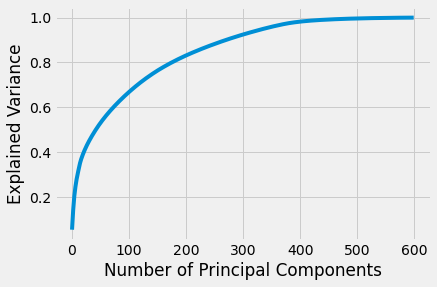

In [535]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

df_pca = pca.fit_transform(df_X)
exp_variances = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.plot(exp_variances);
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")

In [536]:
df_pca = df_pca[:, :200]

In [548]:
df_joined = pd.DataFrame(df_pca.copy())
df_joined = pd.merge(df_desc,df_joined,left_index=True, right_index=True)
df_joined

,index,title,description,variety,0,1,2,3,4,5,...,190,191,192,193,194,195,196,197,198,199
0,0,2020 Black Walnut White,vintage signature white blend black walnut tre...,Traminette,-0.075852,-0.016973,-0.070681,-0.098620,-0.114158,-0.018674,...,-0.019819,0.019485,0.014947,0.010997,0.006088,0.007446,-0.001914,-0.017545,0.010030,0.004075
1,1,James River Hanover Red,blend bright fruit forward beginning gradual c...,Chambourcin,0.009398,-0.091517,-0.064316,-0.035921,0.002387,-0.044744,...,0.026624,0.002678,-0.013983,-0.001867,0.008665,0.011708,-0.032810,-0.022486,0.010121,-0.004980
2,2,Chandon Brut Rose,glass rose pink intense ripe strawberry juice ...,Sparkling_Blend,-0.017048,-0.040499,-0.053290,-0.119717,-0.073166,-0.036716,...,0.003297,-0.021988,0.013428,0.021275,-0.012140,0.017742,0.019492,-0.009330,0.001442,0.010917
3,3,De Venoge Cordon Bleu Rose Brut,snappy acidic quality toasted nut tang cherry ...,Champagne_Blend,-0.026177,-0.025005,-0.030291,-0.099616,-0.059471,-0.040912,...,-0.022338,0.010683,-0.043668,0.022899,-0.015494,0.004269,-0.012332,-0.030814,0.006993,-0.044103
4,0,Nicosia 2013 Vulkà Bianco (Etna),aroma tropical fruit broom brimstone herb pala...,White_Blend,-0.087202,0.001719,-0.043211,-0.139477,-0.170007,-0.027857,...,-0.119761,-0.008248,0.121498,0.068991,0.152276,0.077604,-0.089099,-0.011816,0.049609,-0.082925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118839,129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,note honeysuckle cantaloupe feather light spät...,Riesling,-0.092539,-0.007088,-0.081487,-0.313606,-0.430473,0.839438,...,0.024754,0.147335,0.012568,-0.026673,0.010545,-0.102040,0.067188,-0.004445,0.027817,0.055160
118840,129967,Citation 2004 Pinot Noir (Oregon),citation decade bottle age release pre cellare...,Pinot_Noir,0.809351,0.407085,0.081104,0.113699,0.036350,0.023431,...,0.052752,-0.018747,0.015268,0.056769,0.016350,-0.069306,-0.022176,-0.101270,-0.030992,0.000499
118841,129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,gravel soil wine crisp dry character ripe frui...,Gewürztraminer,-0.038542,-0.037176,-0.043332,-0.131842,-0.044584,-0.017874,...,0.000291,-0.003324,-0.004357,-0.008458,0.005000,0.017980,-0.035791,-0.007886,-0.017448,-0.007477
118842,129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),dry style pinot gris crisp acidic weight solid...,Pinot_Gris,-0.053084,-0.013784,-0.034632,-0.138018,-0.056978,-0.012253,...,-0.000953,0.044833,0.019717,0.039956,-0.016157,-0.075798,-0.001768,-0.004366,-0.047435,-0.046234


In [549]:
df_joined = df_joined.set_index('title')
df_joined = df_joined.drop(columns=['index','description','variety'])
df_joined.shape

(118844, 200)

## KMeans Clustering

In [551]:
from sklearn.cluster import KMeans

#### Find and plot SSEs across a range of potential k values

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }
sse = []
for k in range(50,200,50):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(df_joined)
    sse.append(km.inertia_)

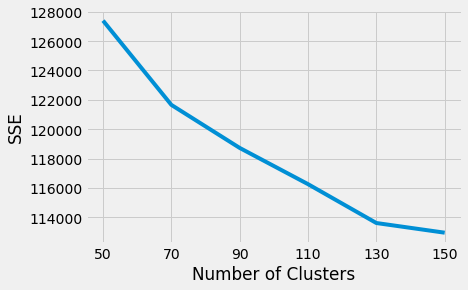

In [476]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(50,160,20), sse)
plt.xticks(range(50,160,20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### 130 clusters looks like a good choice

In [552]:
km = KMeans(n_clusters=130,random_state=20,n_init=10)
km.fit(df_joined)

KMeans(n_clusters=130, random_state=20)

In [553]:
km.labels_

array([ 52,  58, 113, ...,  36, 103,  36], dtype=int32)

In [554]:
km.predict(df_joined.head(7))

array([ 52,  58, 113, 106,  81,  30,  59], dtype=int32)

#### Create a dataframe that includes cluster labels for each wine

In [555]:
cluster_map = df_desc.copy()
cluster_map['cluster'] = km.labels_
cluster_map = cluster_map.drop(columns=['index'])

In [688]:
import stylecloud

In [700]:
text = " ".join(review for review in pinots.description)

In [701]:
text_file = open("/Users/emmaalexander/Downloads/63.txt", "w")
text_file.write(text)
text_file.close()

In [702]:
pinots = stylecloud.gen_stylecloud(
                          file_path='/Users/emmaalexander/Downloads/63.txt',
                          size = 1028,
                          max_words = 25,
                          icon_name = "fas fa-wine-glass",
                          palette='cartocolors.sequential.Magenta_5',
                          custom_stopwords=stop_words,
                          background_color ='white')

In [627]:
cluster_map[cluster_map.cluster == 15].head(20)

,title,description,variety,cluster
119,Pull 2013 Chardonnay (Paso Robles),poached pear yellow apple touch butter classic...,Chardonnay,15
459,Robert Mondavi 2011 Reserve Chardonnay (Carneros),fine acidic bracing mineral lick cold steel wi...,Chardonnay,15
589,Stevens 2016 StevensSteel Chardonnay (Yakima V...,expressive example variety stainless steel aro...,Chardonnay,15
1903,La Chablisienne 2005 Côte de Léchet Premier Cr...,cool cru great year structure austerity steel ...,Chardonnay,15
2217,Jason-Stephens 2012 Estate Reserve Chardonnay ...,lime pith sharp gray slate steel warm lemon cu...,Chardonnay,15
2285,Girardet 2011 Chardonnay (Umpqua Valley),stainless steel touch new french oak note toas...,Chardonnay,15
2378,Airfield Estates 2012 Unoaked Chardonnay (Yaki...,young stainless steel chardonnay beery hoppine...,Chardonnay,15
3339,Chanson Père et Fils 2012 Viré-Clessé,green fruit flavor fresh crisp wine acidic fru...,Chardonnay,15
3490,Heron Hill 2009 Unoaked Ingle Vineyard Chardon...,nose unoaked chardonnay exuberant billowing ri...,Chardonnay,15
3653,Smith-Madrone 2006 Chardonnay (Spring Mountain...,dry crisp chard pure flavor ripe white peach g...,Chardonnay,15


In [634]:
wine_sample = cluster_map.loc[cluster_map['title'] == 'Robert Mondavi 2011 Reserve Chardonnay (Carneros)']
list(wine_sample['description'])

['fine acidic bracing mineral lick cold steel winter day chardonnay oak note background citrus green apple peach flavor beautiful wine winery string great reserve chardonnays good vintage']

In [647]:
wine_rec = df.loc[df['title'] == 'Domaine Christian Moreau Père et Fils 2006 Valmur Grand Cru  (Chablis)']
list(wine_rec['description'])

['An initially wood-laden wine that only slowly reveals the rich fruit character. There is wood certainly, but the spice integrates well with the green fruits and the intense minerality. The great steely backbone on this wine indicates it will age.']

In [590]:
wines_i_like = cluster_map.sample(20)
wines_i_like

,title,description,variety,cluster
73253,J. Lohr 2009 Falcon's Perch Pinot Noir (Monter...,delicious pinot noir upscale fare fruity burst...,Pinot_Noir,31
31977,Condesa de Leganza 2007 Rosado Tempranillo (La...,sweet flesh bone dry balance thorough sugar ar...,Tempranillo,60
95876,González Byass NV Fino Tres Palmas Sherry (Jerez),gold color ideal nose courtesy alluring walnut...,Sherry,3
104747,Blackburn Wine Company 2014 Zinfandel (Central...,black plum black cherry flavor prominent not d...,Zinfandel,114
81993,Planeta 2009 Santa Cecilia Red (Noto),santa cecilia sicilian icon wine quality bench...,Red_Blend,91
69970,Domaine des Pierrettes 2009 Element Terre Sauv...,pure sauvignon blanc herb crisp fruity bright ...,Sauvignon_Blanc,105
53509,Falernia 2015 Reserva Sauvignon Blanc (Elqui V...,sniff line vegetal realm aroma canned green be...,Sauvignon_Blanc,8
96412,Domaine Barmès-Buecher 2015 Réserve Pinot Noir...,hint flinty reduction nose shy crisp red cherr...,Pinot_Noir,63
33306,Star Lane Vineyard 2010 Astral Red (Happy Cany...,extreme tightness end bottling premiere vineya...,Bordeaux_style_Red_Blend,32
85435,Cartograph 2012 Rosé of Pinot Noir (Russian Ri...,wine good job ripe pinot grape raspberry cherr...,Pinot_Noir,37


## Recommender Function Using Clusters

In [559]:
from scipy import stats
import numpy as np

In [632]:
def wine_from_cluster(my_wines, num_recs):
    clusters = my_wines[['cluster']]
    mode = stats.mode(clusters)
    if mode.count[0][0] == 1:
        maxi = np.argmax(clusters.index)
        mode = clusters.iloc[maxi]['cluster']
    else:
        mode = stats.mode(clusters)[0]
        mode = mode[0]
        mode = mode[0]
    subsection = cluster_map[cluster_map.cluster == mode]
    wine_recs = subsection.sample(n=num_recs)
    return wine_recs

In [644]:
crecs = wine_from_cluster(wine_sample, 3)
crecs.iloc[0]['title']

'Domaine Christian Moreau Père et Fils 2006 Valmur Grand Cru  (Chablis)'

In [615]:
df_desc.iloc[64180]['description']

'interesting aroma flavor biscuit toast lemon ginger texture mature wine good acidic apple lime spice flavor appealing mix heavy light element apple mint note'

In [478]:
import scattertext as st

In [657]:
champagne_blends = cluster_map[cluster_map.cluster == 106][['description']]

In [592]:
hm = cluster_map[cluster_map.cluster == 63][['description']]

In [588]:
cluster_map[cluster_map.cluster == 11]

,title,description,variety,cluster
137,Poderi Luigi Einaudi 2003 Barolo,einaudi wine barolo impressive condition vinta...,Nebbiolo,11
438,Revello Fratelli 2012 Rocche dell'Annunziata ...,coffee oak coconut raspberry confiture aroma w...,Nebbiolo,11
729,Paolo Manzone 2012 Meriame (Barolo),aroma leaf underbrush sawdust menthol dense oa...,Nebbiolo,11
743,Marchesi di Barolo 2009 Riserva (Barolo),roasted coffee bean menthol aroma nose palate ...,Nebbiolo,11
913,Castello di Neive 2013 Barbaresco,aroma toast oak menthol resin coffee bean medi...,Nebbiolo,11
...,...,...,...,...
117437,Virna Borgogno 2013 del Comune di Barolo (Bar...,underbrush coconut espresso floral aroma nose ...,Nebbiolo,11
118307,Ceretto 2011 Bernardot (Barbaresco),pretty aroma violet sandalwood incense plum ch...,Nebbiolo,11
118485,Gemma 2008 Gibin Riserva (Barolo),aroma raw oak tire rubber jam palate raspberry...,Nebbiolo,11
118705,Vigin 2008 NonnOrlando (Barbaresco),barbaresco nonnorlando clean subtle aroma char...,Nebbiolo,11


In [695]:
nebbiolos = cluster_map[cluster_map.cluster == 11][['description']]
nebbiolos

,description
137,einaudi wine barolo impressive condition vinta...
438,coffee oak coconut raspberry confiture aroma w...
729,aroma leaf underbrush sawdust menthol dense oa...
743,roasted coffee bean menthol aroma nose palate ...
913,aroma toast oak menthol resin coffee bean medi...
...,...
117437,underbrush coconut espresso floral aroma nose ...
118307,pretty aroma violet sandalwood incense plum ch...
118485,aroma raw oak tire rubber jam palate raspberry...
118705,barbaresco nonnorlando clean subtle aroma char...


In [699]:
pinots = cluster_map[cluster_map.cluster == 63][['description']]
pinots

,description
311,rich mouth red fruit black cherry wine sweet t...
361,vine year old heart clos de vougeot vineyard i...
475,rich opulent pinot noir ripe berry flavor bala...
476,wine ripe rich mouth fruit salad red cherry pl...
522,walled vineyard local bishop wine firm great r...
...,...
118697,tight tannin wine considerable acidic fresh re...
118711,fresh juice wine attractive acidic red berry f...
118804,power chunky wine solid tannin good age sense ...
118809,blend premier cru vineyard pommard wine right ...


In [511]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


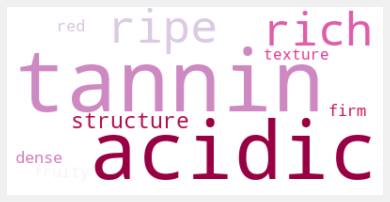

In [593]:
text = " ".join(review for review in hm.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10,stopwords=stop_words, background_color="white",colormap='PuRd').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

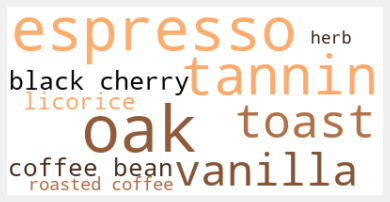

In [580]:
text = " ".join(review for review in barolos.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10,stopwords=stop_words, background_color="white",colormap='copper').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

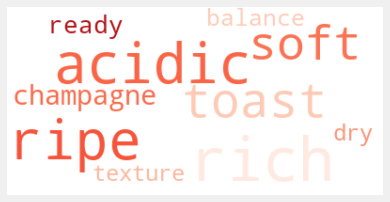

In [587]:
text = " ".join(review for review in champagne_blends.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10,stopwords=stop_words, background_color="white",colormap='Reds').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()